In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LogisticRegression     
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Model Evaluation

from sklearn.metrics import confusion_matrix,classification_report

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Documents\Python Imarticus\Hotel Reservations.csv")

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Target Variable : Booking Status

### Data Overview

In [6]:
df.shape

(36275, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# EDA

In [9]:
df[df.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### There are no duplicate values.

### There are no null values either. So we can go ahead with feature engineering

In [10]:
for i in df.columns:
    print(i,'-->',df[i].nunique())
    print(df[i].unique())

Booking_ID --> 36275
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults --> 5
[2 1 3 0 4]
no_of_children --> 6
[ 0  2  1  3 10  9]
no_of_weekend_nights --> 8
[1 2 0 4 3 6 5 7]
no_of_week_nights --> 18
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan --> 4
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space --> 2
[0 1]
room_type_reserved --> 7
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time --> 352
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 

In [11]:
df[(df['no_of_adults']==0) & (df['no_of_children']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### So there are no columns where both no of adults and no of children are zero. If there was an entry like that we will have to drop it.

In [12]:
df[(df['no_of_adults']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


### We can see that there are records where no of adults=0 and no of children are having values of 1,2etc. But this cannot be possible since childrens won't be allowed to stay without parents

### So I'm going to swap the columns of adults and children where the number of adults is 0, I will be swapping them with the corresponding values of number of children column since I believe there must be an error while entering the values by the respective person

In [13]:
#defining a condition
condition = df['no_of_adults'] ==0

#We create a temporary variable temp to hold the values of column 'no_of_adults' where the condition is True.
#Next, we swap the values of column 'no_of_adults' and column 'no_of_children' where the condition is True. 
#Finally, we assign the values from temp back to column 'no_of_children'.

temp = df.loc[condition, 'no_of_adults'].copy()
df.loc[condition, 'no_of_adults'] = df.loc[condition, 'no_of_children']
df.loc[condition, 'no_of_children'] = temp

In [14]:
df[(df['no_of_adults']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### We won't be using Unique ID column also hence dropping it

In [15]:
df.drop('Booking_ID',axis=1,inplace=True)

### Our EDA process is done now

# Data Visualization

<AxesSubplot:xlabel='booking_status', ylabel='count'>

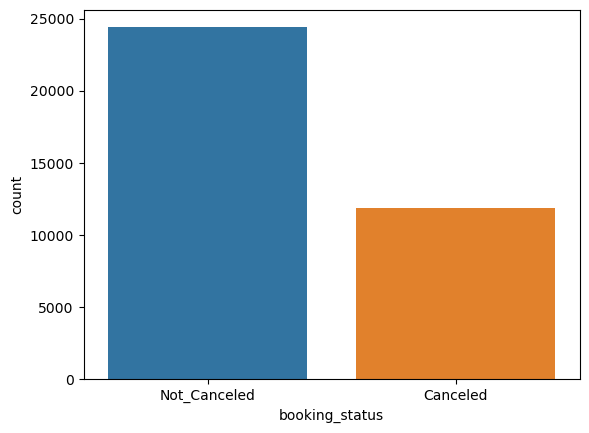

In [16]:
sns.countplot(df.booking_status)

In [17]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

### Target variable has 67% Not Calceled values and 33% Canceled values.

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

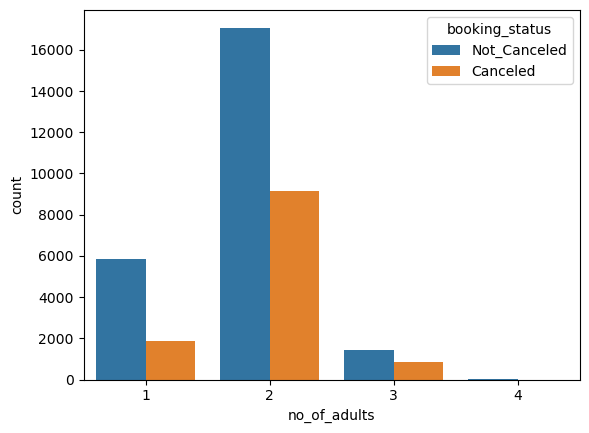

In [18]:
sns.countplot(df.no_of_adults,hue=df.booking_status)

In [28]:
df.groupby('no_of_adults')['booking_status'].value_counts(normalize=True)

no_of_adults  booking_status
1             Not_Canceled      0.758836
              Canceled          0.241164
2             Not_Canceled      0.650814
              Canceled          0.349186
3             Not_Canceled      0.628338
              Canceled          0.371662
4             Not_Canceled      0.812500
              Canceled          0.187500
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

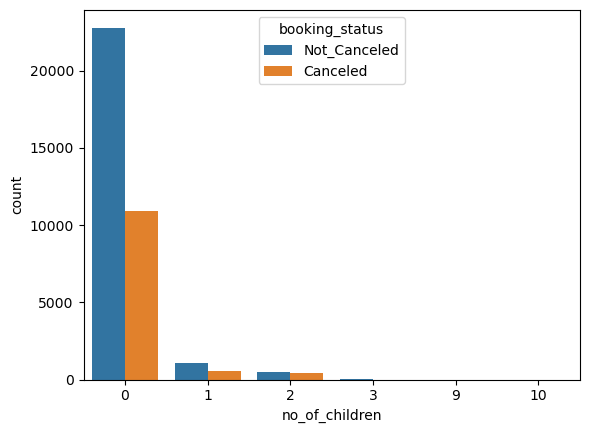

In [20]:
sns.countplot(df.no_of_children,hue=df.booking_status)

In [25]:
df.groupby('no_of_children')['booking_status'].value_counts(normalize=True)

no_of_children  booking_status
0               Not_Canceled      0.675940
                Canceled          0.324060
1               Not_Canceled      0.666048
                Canceled          0.333952
2               Not_Canceled      0.553514
                Canceled          0.446486
3               Not_Canceled      0.642857
                Canceled          0.357143
9               Canceled          0.500000
                Not_Canceled      0.500000
10              Not_Canceled      1.000000
Name: booking_status, dtype: float64

### We can see that the hotel is mostly attracting young couples. So the hotel can create curated experiences for couples and can improve their customer experience since we can see that mostly couples with no kids cancel the most also. Also the hotel can look into the couples who cancelled and get their feedback on why they cancelled as the hotel might want to work on the shortcomings if it's related to pricing, experiences or even the rooms as this can help to drive up the profits 

In [22]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

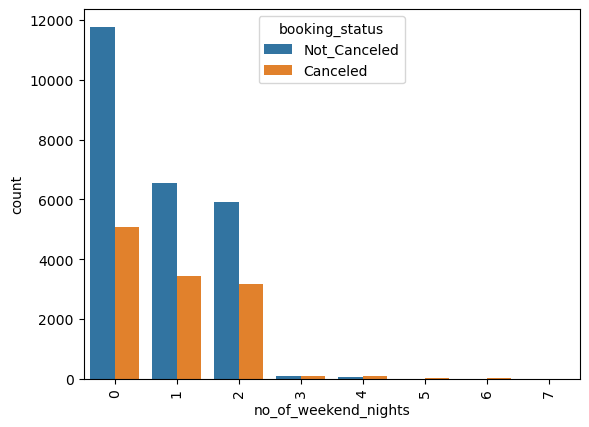

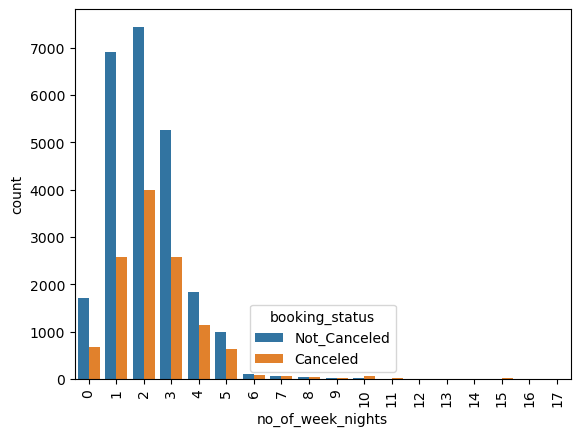

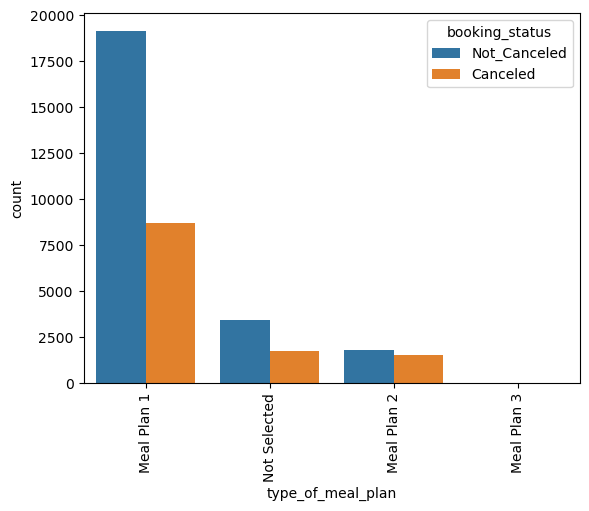

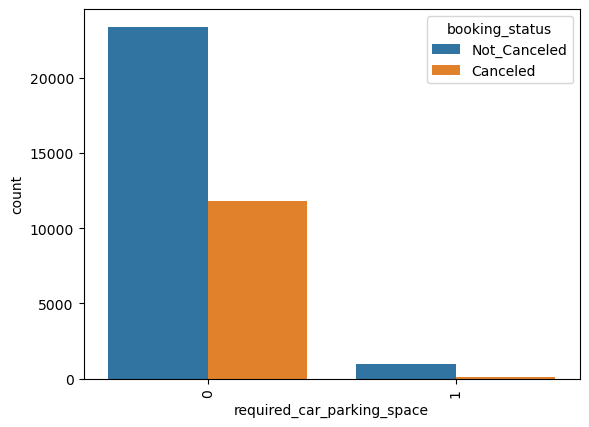

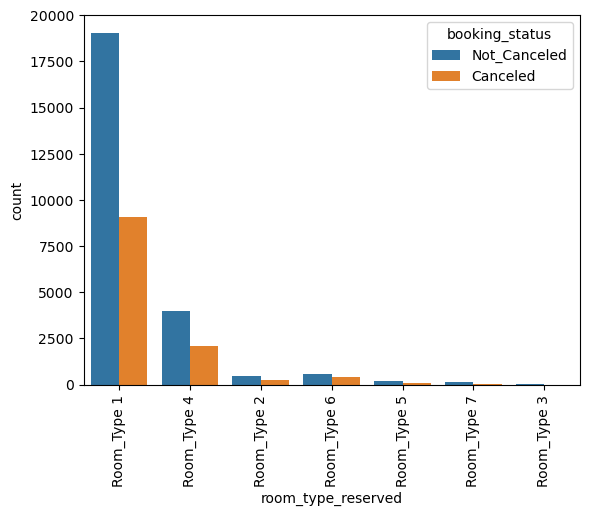

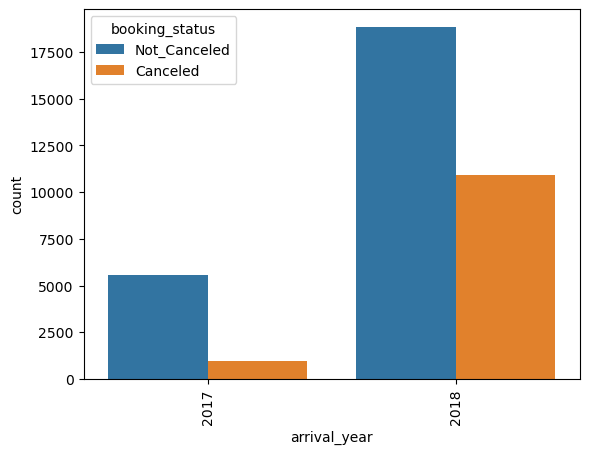

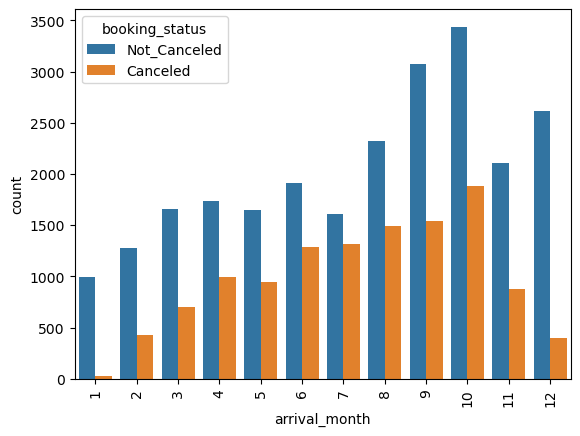

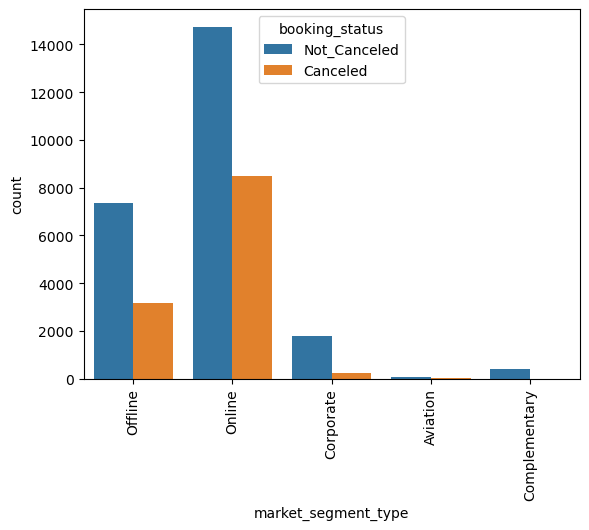

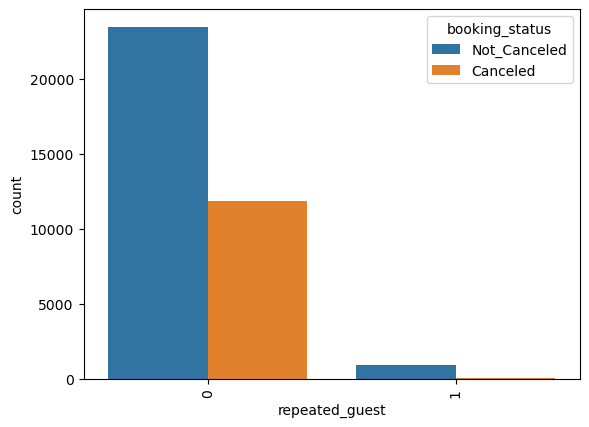

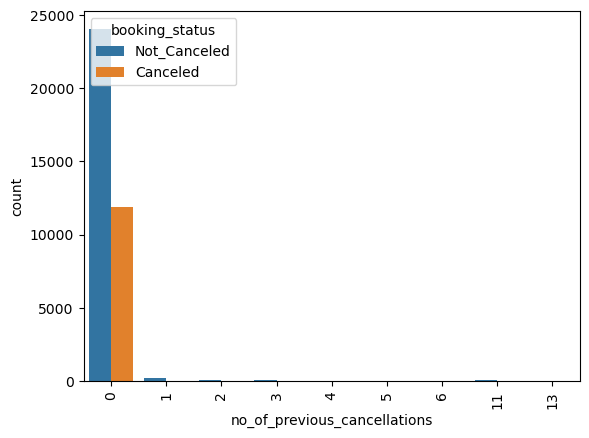

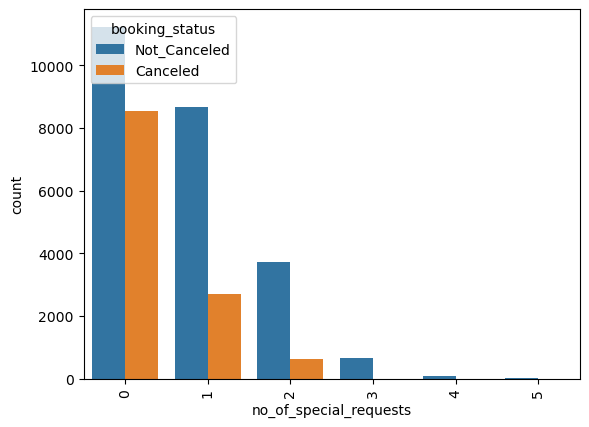

In [75]:
cat_features = df[['no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','arrival_year','arrival_month','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_special_requests']]
for i in cat_features.columns:
        sns.countplot(cat_features[i],hue=df.booking_status)
        plt.xticks(rotation = 90)
        plt.show()

Inferences from the visualization:
1. People come mostly for weekday stay than for weekend. So it'll be busy in the weekdays than in weekends.
2. Type of meal plan 1 was most preferred by the customers. So the hotel can take feedbacks on the meal plan and work on improving customer satisfaction as it'll create better reputation for the hotel. Also the cancellation percentage was higher when they had selected meal plan 2.
3. Most people doesn't require car parking space and of those who require car parking space, the cancellation rate is very low.
4. Room Type 1 and Room Type 4 are mostly preferred with Room Type 1 being the highest.
5. The peak season begins from july and there is steep increase in demand till october followed by a fall in demand in november and a small increase in december.
6. We can see that in July the cancellation rate was very high. So the hotel might want to check into it. Also they must at all cost try to reduce the cancellation as much as possible during this peak season.
7. The cancellation rates are really low in the month of Dec and Jan.
8. People prefer booking online. But the cancellation rate of people booking online is higher than offline
9. Also in corporate bookings there's least amount of cancellation.
10. Since data in 2018 is more, the number of repeated guests is really small. But amoung the repeated guests the cancellation rate is really low.
11. Number of people having no special requests are more but the cancellation rate of that category is huge. Whereas people who make special requests has very less chance to cancel their reservation.  


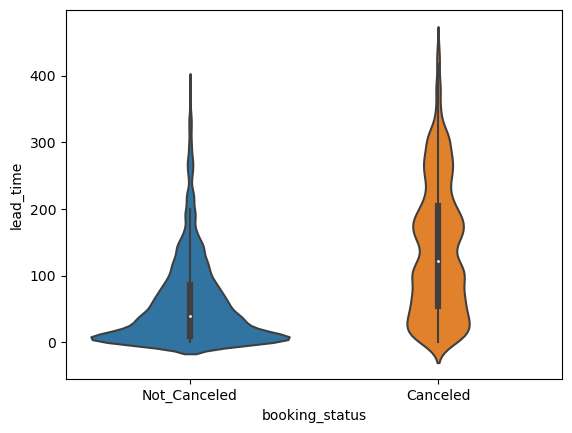

In [29]:
sns.violinplot(x='booking_status', y='lead_time', data=df)
plt.show()

### We can see that people with very less lead time tend to not cancel their reservations, whereas as the lead time increases chances of cancellation increases

### Let me covert target variable to binary variables so as to perform encoding on other categorical features

In [22]:
data = df.copy()

In [23]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [24]:
data['booking_status'] = data['booking_status'].replace({'Canceled':1,'Not_Canceled':0})

### Changing booking status values to binary values so as to perform one hot encoding on other categorical features

In [25]:
data = pd.get_dummies(data,drop_first=True)

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


### Seperating dependent and Independent variable

In [28]:
X = data.drop('booking_status',axis=1)
y = data['booking_status']

In [29]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (36275, 27), Dependent Features Shape = (36275,)


### Performing Train-Test-Split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

### Logistic Regression

In [31]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17046
           1       0.73      0.59      0.66      8346

    accuracy                           0.80     25392
   macro avg       0.78      0.74      0.76     25392
weighted avg       0.79      0.80      0.79     25392

[[15245  1801]
 [ 3383  4963]]


### Decision Tree

In [32]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17046
           1       1.00      0.99      0.99      8346

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

[[17025    21]
 [  112  8234]]


In [33]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7344
           1       0.80      0.80      0.80      3539

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

[[6614  730]
 [ 701 2838]]


### Random Forest

In [34]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17046
           1       0.99      0.99      0.99      8346

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

[[16997    49]
 [   84  8262]]


In [35]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7344
           1       0.87      0.81      0.84      3539

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883

[[6921  423]
 [ 676 2863]]


### My random forest model is giving me the highest accuracy for test data hence let me perform hyperparameter tuning for random forest model

In [37]:
## Establishing some parameters
parameters = {'n_estimators':[100,200,300],
              'max_features':['log2', 'sqrt'],
              'max_depth':[3,4,5,6,7],
              'min_samples_split':[2,6,8,10,14],
              'min_samples_leaf':[1,2,3,4,5],
              'criterion':['gini', 'entropy', 'log_loss']
              }

In [38]:
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameters,cv=5,random_state = 0)

In [39]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 6, 8, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [40]:
# best Parameter
RF_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [41]:
RF=RandomForestClassifier(n_estimators= 100,min_samples_split= 2,min_samples_leaf= 3,max_features= 'sqrt',max_depth= 7,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17046
           1       0.87      0.64      0.74      8346

    accuracy                           0.85     25392
   macro avg       0.86      0.79      0.81     25392
weighted avg       0.85      0.85      0.84     25392

[[16265   781]
 [ 3042  5304]]


In [42]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7344
           1       0.86      0.63      0.72      3539

    accuracy                           0.85     10883
   macro avg       0.85      0.79      0.81     10883
weighted avg       0.85      0.85      0.84     10883

[[6985  359]
 [1327 2212]]


### Hence I've gotten 85% accuracy for my training and test data and it has also overcome overfitting.

### Let me select best features and train my model once again to see if my accuracy increases even more

In [44]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [45]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<AxesSubplot:>

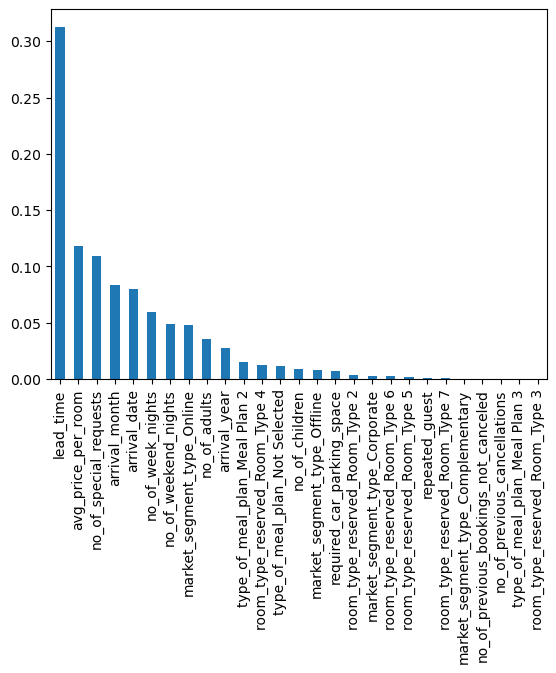

In [46]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [56]:
X_imp = X[feat_importances.nlargest(10).index]

In [57]:
X_imp

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,no_of_week_nights,no_of_weekend_nights,market_segment_type_Online,no_of_adults,arrival_year
0,224,65.00,0,10,2,2,1,0,2,2017
1,5,106.68,1,11,6,3,2,1,2,2018
2,1,60.00,0,2,28,1,2,1,1,2018
3,211,100.00,0,5,20,2,0,1,2,2018
4,48,94.50,0,4,11,1,1,1,2,2018
...,...,...,...,...,...,...,...,...,...,...
36270,85,167.80,1,8,3,6,2,1,3,2018
36271,228,90.95,2,10,17,3,1,1,2,2018
36272,148,98.39,2,7,1,6,2,1,2,2018
36273,63,94.50,0,4,21,3,0,1,2,2018


#### Now i will build the model by keeping top featues that are helping to target variable

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.3,random_state = 14)

In [61]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameters,cv=5,random_state = 0)
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=7,
                                                    max_features='sqrt',
                                                    min_samples_leaf=3),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 6, 8, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [62]:
# best Parameter
RF_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [63]:
RF=RandomForestClassifier(n_estimators= 100,min_samples_split= 2,min_samples_leaf= 3,max_features= 'sqrt',max_depth= 7,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     17046
           1       0.85      0.71      0.77      8346

    accuracy                           0.86     25392
   macro avg       0.86      0.82      0.84     25392
weighted avg       0.86      0.86      0.86     25392

[[16009  1037]
 [ 2443  5903]]


In [64]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7344
           1       0.84      0.69      0.76      3539

    accuracy                           0.86     10883
   macro avg       0.85      0.81      0.83     10883
weighted avg       0.85      0.86      0.85     10883

[[6864  480]
 [1087 2452]]


### Hence after selecting the best 10 features I've increased my accuracy by 1%